In [9]:
import os
import re
dir = './results_16_cores_c07/'
pattern = re.compile(r"results_ping_pong_16_cores_7x[0-9]+")
files = [f for f in os.listdir(dir) if pattern.match(f)]
values = {}
for f in files:
    split = f.split('x')
    num_clients = int(split[1])
    f = open(dir + f, "r")
    p50 = 0
    qps = 0
    for line in f:
        if "p50" in line:
            p50 = int(re.search(r'value: \d+', line).group().removeprefix("value: "))
        if "qps" in line:
            qps = int(re.search(r' \d+', line).group().lstrip())
    values[num_clients] = (p50, qps)
for key in sorted(values):
    print("num clients %d p50 %d qps %d" % (key, values[key][0], values[key][1]))

num clients 1 p50 88 qps 11214
num clients 2 p50 89 qps 21923
num clients 4 p50 94 qps 39715
num clients 5 p50 97 qps 47146
num clients 6 p50 103 qps 53007
num clients 8 p50 112 qps 63814
num clients 10 p50 121 qps 72049
num clients 12 p50 132 qps 77667
num clients 14 p50 147 qps 81619
num clients 16 p50 155 qps 87789
num clients 18 p50 170 qps 89900
num clients 20 p50 185 qps 91495
num clients 22 p50 199 qps 93492
num clients 24 p50 216 qps 93780
num clients 26 p50 228 qps 96341
num clients 28 p50 250 qps 94815
num clients 30 p50 263 qps 96387


[11896, 21905, 37721, 50680, 62101, 71691, 78803, 84635, 87824, 92824, 93219, 95106, 96271, 97861, 97772, 97935, 99341, 98683, 100393, 100024]
[84, 89, 97, 104, 112, 120, 130, 141, 153, 165, 182, 195, 211, 226, 243, 260, 274, 293, 304, 320]


(0.0, 331.8)

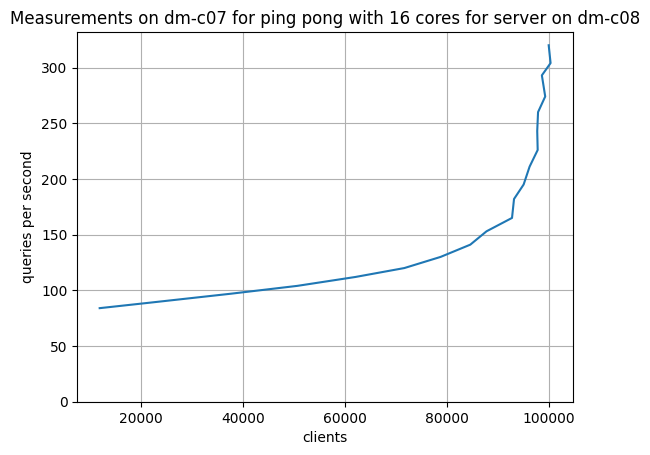

In [8]:
import matplotlib.pyplot as plt

x_values = [values[key][1] for key in sorted(values)]
y_values = [values[key][0] for key in sorted(values) if key < 50]
print(x_values)
print(y_values)
plt.xlabel("clients")
plt.ylabel("queries per second")
plt.title('Measurements on dm-c07 for ping pong with 16 cores for server on dm-c08')
plt.plot(x_values, y_values)
plt.grid()
plt.ylim(ymin=0)